# Generation of data-set

In [ ]:
from random import Random
'''
This Python function named generate_num generates two lists of random numbers lst_x and lst_y with N elements each.
The N parameter sets the number of elements in each list, and its default value is 1000.

The function uses the Random() class from the random module to generate random numbers. 
It initializes a Random object with a seed value of 5.

Inside the function, two empty lists lst_x and lst_y are created to store the random numbers. 
Two for loops are used to append N random numbers in the range between 1 and 2 (exclusive) to lst_x and lst_y, 
respectively, using the uniform() method of the Random object.
'''
def generate_num(N=1000):
  SEED = 5
  random_num = Random(x=SEED)
  lst_x, lst_y = [],[]
  for _ in range(N):
    lst_x.append(random_num.uniform(a=1,b=2))
  for _ in range(N):
    lst_y.append(random_num.uniform(a=1,b=2))
  return lst_x, lst_y
data_x, data_y =generate_num()
print(data_x[:10])
print(data_y[:10])

# LIST COMPREHENSION
'''
This is a refactored version of the previous generate_num function. 
It also generates two lists of random numbers lst_x and lst_y with N elements each, 
where N is the number of elements in each list, and its default value is 1000.

Like the previous function, it uses the Random() class from the random module to generate random numbers, 
and initializes a Random object with a seed value of 5.

However, instead of using two for loops to append random numbers to the two lists, 
this refactored version uses list comprehension to generate the two lists of random numbers in a more concise and efficient way. 
It creates two lists by calling random_num.uniform(a=1,b=2) N times for each list, and returns them as a tuple.

Overall, this refactored version of the function generates the same output as the previous function, 
but with a more compact and pythonic syntax.
'''
def comp_generate_num(N=1000):
  SEED = 5
  random_num = Random(x=SEED)
  return(
      [random_num.uniform(a=1,b=2)
      for _ in range(N)],
      [random_num.uniform(a=1,b=2)
      for _ in range(N)]
  )
data_x, data_y = comp_generate_num()
print(data_x[:10])
print(data_y[:10])


[1.622901694889702, 1.7417869892607294, 1.7951935655656968, 1.9424502837770503, 1.7398985747399307, 1.922324996665417, 1.0290052282836148, 1.4656226543781052, 1.9433567169983137, 1.6489745531369242]
[1.8713187027692235, 1.0397677125483866, 1.588855165328111, 1.1174537421211483, 1.721120830858009, 1.6113236281477743, 1.6120458139259322, 1.221521299603685, 1.9490212551961823, 1.1110249512327846]
[1.622901694889702, 1.7417869892607294, 1.7951935655656968, 1.9424502837770503, 1.7398985747399307, 1.922324996665417, 1.0290052282836148, 1.4656226543781052, 1.9433567169983137, 1.6489745531369242]
[1.8713187027692235, 1.0397677125483866, 1.588855165328111, 1.1174537421211483, 1.721120830858009, 1.6113236281477743, 1.6120458139259322, 1.221521299603685, 1.9490212551961823, 1.1110249512327846]


# Visualising data

<bound method Figure.show of <Figure size 720x720 with 1 Axes>>

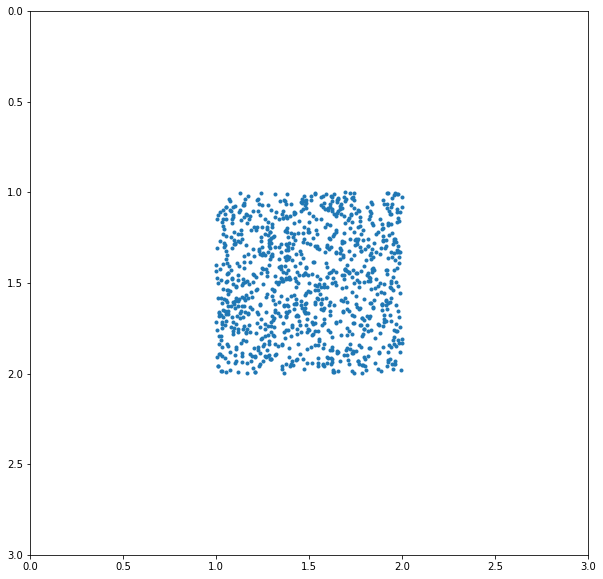

In [ ]:
'''
First, it imports the figure module from matplotlib.
pyplot and creates a new figure object fig with a size of 10 by 10 inches using figure(figsize=(10,10)).

Next, it adds a subplot to the figure using fig.add_subplot(1,1,1). 
This creates a single subplot in the figure, with the first argument 1 representing the number of rows, 
the second argument 1 representing the number of columns, and the third argument 1 representing the index of the subplot.

Then, it creates a scatter plot on the subplot using ax.scatter(x=data_x , y= data_y, marker = "." ). 
The x and y arguments are the data points to be plotted on the x-axis and y-axis respectively, 
and marker specifies the marker style for the scatter plot.

After that, it sets the limits for the x and y axes using ax.set_xlim(left = 0, right= 3) and ax.set_ylim(top = 0, bottom= 3), 
limiting the range from 0 to 3 for both axes.
'''
from matplotlib.pyplot import figure
fig= figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=data_x , y= data_y, marker = "." )
ax.set_xlim(left = 0, right= 3)
ax.set_ylim(top = 0, bottom= 3)
fig.show

# The loss function
Let:
- The solution: ($x_{p}$, $y_{p}$)
- The dataset $\mathbb{D}$ is a {($x_{i}$, $y_{i}$)}
- $\mathbb{L}$ be the loss function and the solution be
$$(x_{p}, y_{p}) = argmin(\mathbb{L})$$
<br>
$$where\;\mathbb{L} = \frac{1}{N} \sum_{i=0}^{N-1}[(x_{i} - x_{p})^{2} + (y_{i} - y_{p})^{2}]^{\frac{1}{2}}$$

# Evaluation of loss function

In [ ]:
'''
Inside the function, it calculates the loss value based on the Euclidean distance between the point (x_p, y_p) and each point in a dataset,
represented by data_x and data_y. 
It uses the zip function to iterate over the two datasets simultaneously and calculate the distance between each point and (x_p, y_p).
'''
from math import sqrt as root
def loss(x_p, y_p):
  return (1/len(data_y))* sum([root((x_i-x_p)**2+(y_i-y_p)**2) for x_i , y_i in zip(data_x, data_y)])
print(loss(0.5,0.5))

1.4330454296351365


# Visualising loss function

In [ ]:
STEP = 0.01
MESH_SIZE = 300
x_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
y_mesh = [0 + i* STEP for i in range(MESH_SIZE)]
z_mesh = [
    [loss(x_curr, y_curr) for x_curr in x_mesh]
          for y_curr in y_mesh
          ]

In [ ]:
from matplotlib.figure import projections
fig_2 = figure(figsize=(20,20))

#intialise place of plot
ax_new = fig_2.add_subplot(2,2,1, projection = "3d")
ax_new2 = fig_2.add_subplot(2,2,2, projection = "3d")
ax_new3 = fig_2.add_subplot(2,2,3, projection = "3d")
ax_new4 = fig_2.add_subplot(2,2,4, projection = "3d")

#defining contour "mesh(x,y,z)" and levels "specifies the number of contour lines to be drawn"
ax_new.contour(x_mesh,y_mesh,z_mesh)
ax_new2.contour(x_mesh,y_mesh,z_mesh, levels =500)
ax_new3.contour(x_mesh,y_mesh,z_mesh, levels =500)
ax_new4.contour(x_mesh,y_mesh,z_mesh, levels =500)

#changing rotion of plot
ax_new3.view_init(elev = 270)
ax_new4.view_init(elev = 60)

fig_2.show()



# Numeric Method of Derivatives
It comes for the main definition of the derivative
<br><br>
$\frac{\partial \mathbb{L}}{\partial x} = \lim_{h \to 0} \frac{\mathbb{L}(x+h) - \mathbb{L}(x)}{h}$
<br><br>
By replacing the asymptotically infinitesimal by pragmatically small of values we can get a definition of deriviative that can be numerically computed 

<bound method Figure.show of <Figure size 720x720 with 1 Axes>>

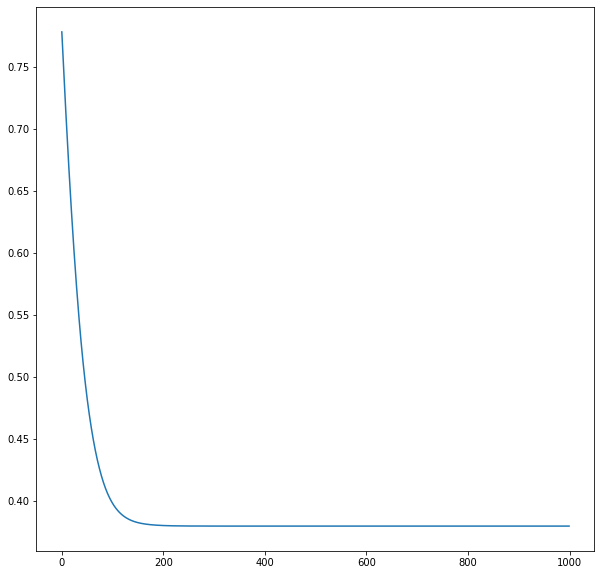

In [ ]:
x_p , y_p = 2,2
EPOCHS =1000
DELTA = 0.01
H = 0.001
losses = []
'''
First, it initializes the coordinates of the starting point (x_p, y_p) to be (2, 2), the number of epochs to be 1000, the learning rate DELTA to be 0.01, and the step size H to be 0.001. 
It also initializes an empty list losses to store the loss values for each epoch.

Then, it enters a loop that runs for EPOCHS times. In each epoch, it calculates the current loss value using loss(x_p,y_p) and appends it to the losses list.

Next, it calculates the partial derivatives of the loss function with respect to x and y at the current point (x_p, y_p) using the finite difference method. 
It calculates dl_dx by subtracting the loss at (x_p + H, y_p) from the current loss value and dividing by H. 
It calculates dl_dy similarly by subtracting the loss at (x_p, y_p + H) from the current loss value and dividing by H.

After that, it updates the values of x_p and y_p using the gradient descent update rule. It subtracts DELTA * dl_dx from x_p and subtracts DELTA * dl_dy from y_p.
'''
for _ in range(EPOCHS):
  losses.append(loss(x_p,y_p))
  dl_dx = (loss(x_p + H , y_p) - loss(x_p,y_p)) /H
  dl_dy = ( loss(x_p  , y_p + H) - loss(x_p,y_p) ) /H
  x_p -= DELTA *dl_dx
  y_p -= DELTA *dl_dy

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(losses)
fig.show

<bound method Figure.show of <Figure size 720x720 with 1 Axes>>

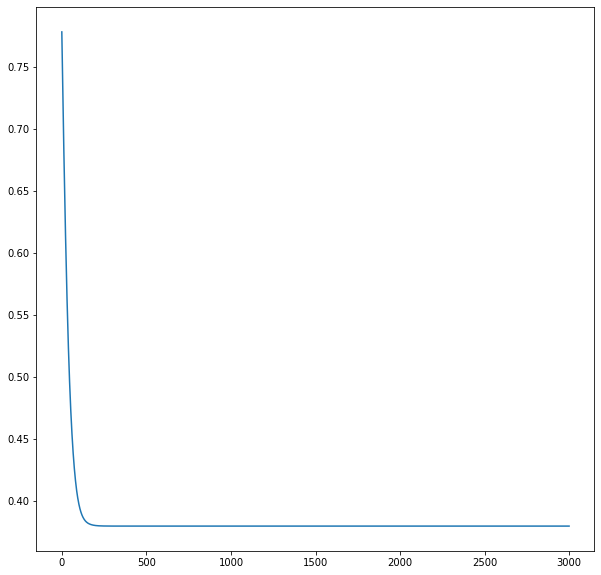

In [ ]:
from pickle import NONE
x_p , y_p = 2,2
EPOCHS =3000
DELTA = 0.01
H = 0.001
losses = []
for _ in range(EPOCHS):
  losses.append(loss(x_p,y_p))
  dl_dx = (loss(x_p + H , y_p) - loss(x_p,y_p)) /H
  dl_dy = ( loss(x_p  , y_p + H) - loss(x_p,y_p) ) /H
  x_p -= DELTA *dl_dx
  y_p -= DELTA *dl_dy

fig = figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot(losses)
fig.show